In [8]:
import pandas as pd

In [9]:
file_path = '/content/all_stocks_5yr.csv'
data = pd.read_csv(file_path)

In [10]:
data_head = data.head()

# Get summary information about the dataset
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [11]:
missing_values = data.isnull().sum()
missing_values

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


In [12]:
data = data.dropna()

In [13]:
missing_values=data.isnull().sum()
missing_values

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [14]:
data_description = data.describe()
data_description

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

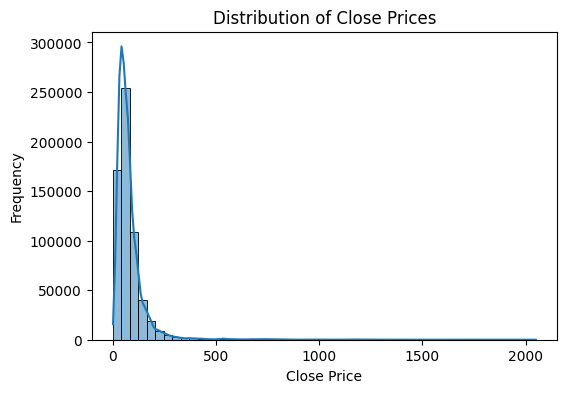

In [16]:
# Visualization 1: Histogram of adjusted close prices
plt.figure(figsize=(6, 4))
sns.histplot(data['close'], bins=50, kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

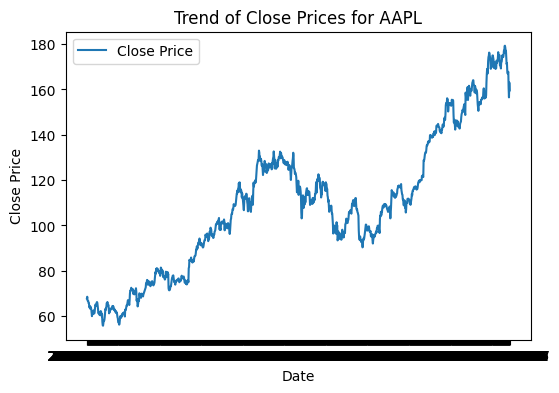

In [17]:
# Visualization 2: Line chart of closing prices for a specific stock
stock_data = data[data['Name'] == 'AAPL']  # Replace 'AAPL' with your stock symbol of choice
plt.figure(figsize=(6, 4))
plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
plt.title('Trend of Close Prices for AAPL')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

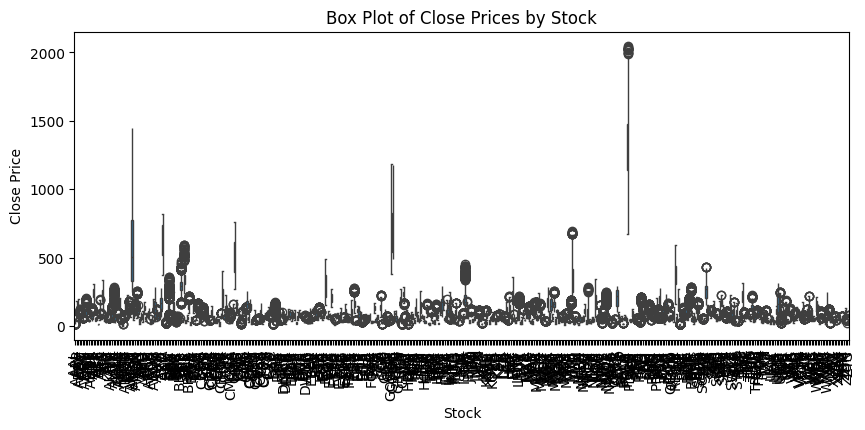

In [18]:
# Visualization 3: Box plot of close prices by stock
plt.figure(figsize=(10, 4))
sns.boxplot(x='Name', y='close', data=data)
plt.title('Box Plot of Close Prices by Stock')
plt.xlabel('Stock')
plt.ylabel('Close Price')
plt.xticks(rotation=90)
plt.show()

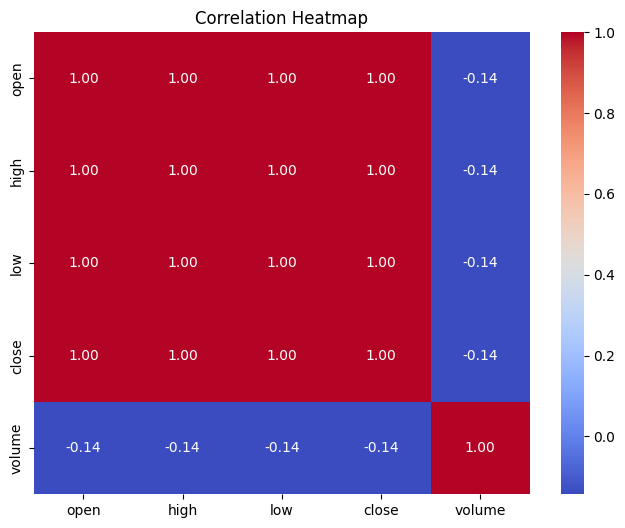

In [19]:
# Visualization 4: Heatmap of correlations between numerical features
plt.figure(figsize=(8, 6))
corr = data[['open', 'high', 'low', 'close', 'volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

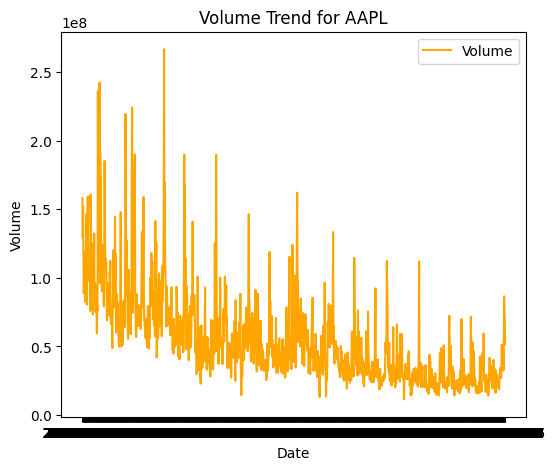

In [20]:
# Visualization 5: Volume trend for a specific stock (e.g., AAPL)
stock_data = data[data['Name'] == 'AAPL']  # Replace 'AAPL' with another symbol if needed
plt.figure(figsize=(6, 5))
plt.plot(stock_data['date'], stock_data['volume'], label='Volume', color='orange')
plt.title('Volume Trend for AAPL')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

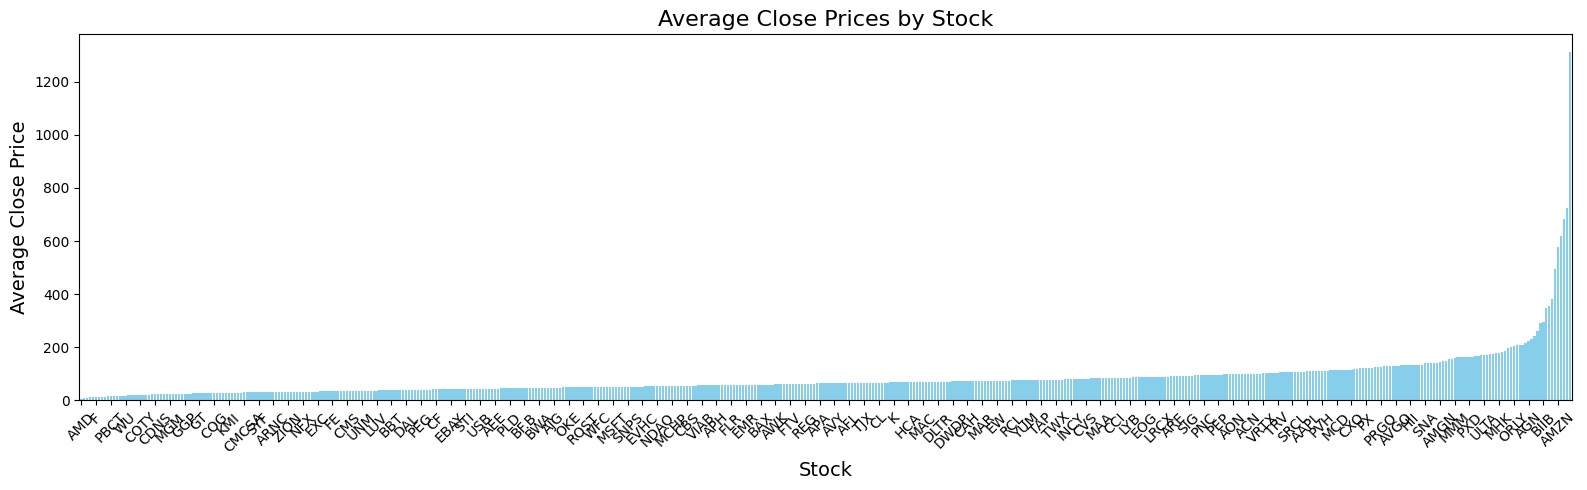

In [21]:
avg_close_prices = data.groupby('Name')['close'].mean().sort_values()

# Increase figure size
plt.figure(figsize=(16, 5))

# Plot bar chart
avg_close_prices.plot(kind='bar', color='skyblue', width=0.8)

# Set title and labels
plt.title('Average Close Prices by Stock', fontsize=16)
plt.xlabel('Stock', fontsize=14)
plt.ylabel('Average Close Price', fontsize=14)

# Show only every 5th label
plt.xticks(ticks=range(len(avg_close_prices)), labels=avg_close_prices.index, rotation=45, fontsize=10)
plt.xticks(ticks=plt.xticks()[0][::5], rotation=45)  # Display every 5th stock name

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


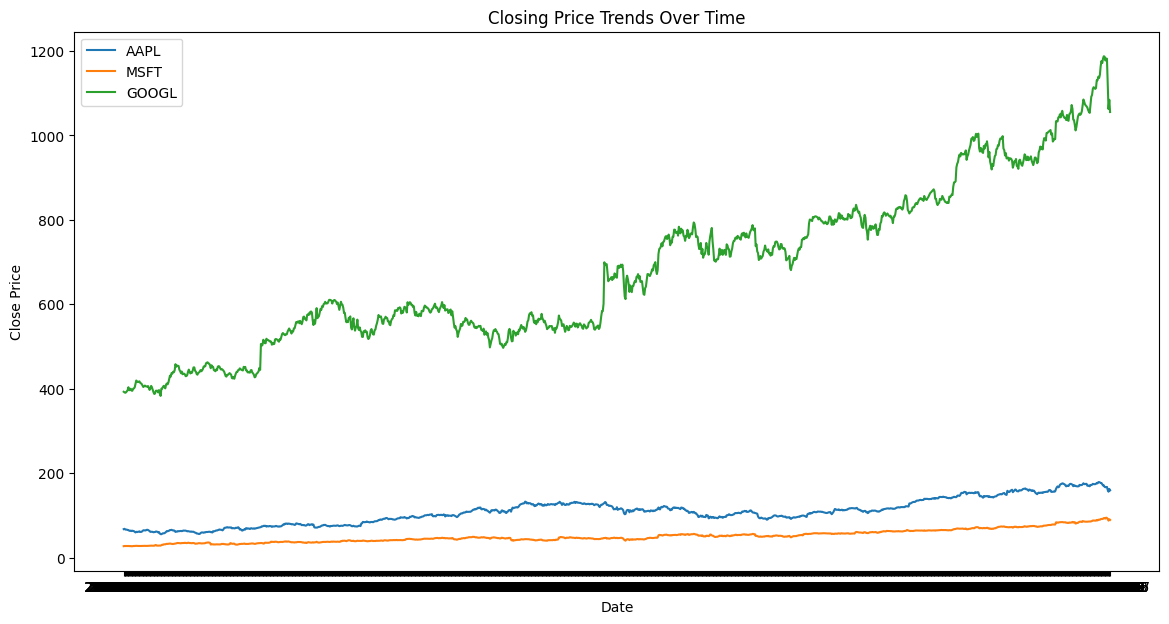

In [22]:
# Filter data for specific stocks
stocks = ['AAPL', 'MSFT', 'GOOGL']
filtered_data = data[data['Name'].isin(stocks)]

# Plot the trends
plt.figure(figsize=(14, 7))
for stock in stocks:
    stock_data = filtered_data[filtered_data['Name'] == stock]
    plt.plot(stock_data['date'], stock_data['close'], label=stock)

plt.title('Closing Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

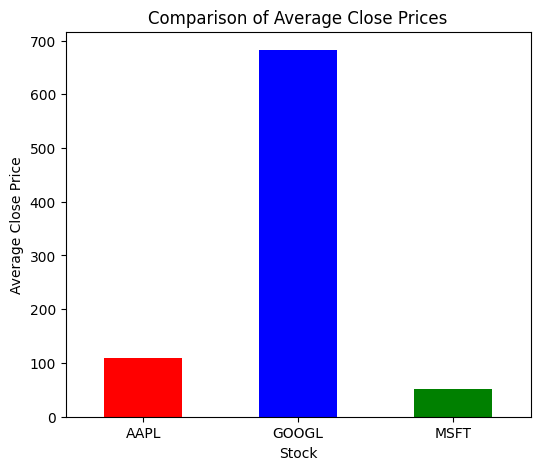

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
# Filter data for specific stocks
stocks = ['AAPL', 'MSFT', 'GOOGL']
filtered_data = data[data['Name'].isin(stocks)]

# Calculate average close prices for selected stocks
average_close_prices = filtered_data.groupby('Name')['close'].mean()

# Plot the bar chart
plt.figure(figsize=(6, 5))
average_close_prices.plot(kind='bar', color=['red', 'blue', 'green'])

# Customize the plot
plt.title('Comparison of Average Close Prices')
plt.xlabel('Stock')
plt.ylabel('Average Close Price')
plt.xticks(rotation=0)  # Ensure the labels are horizontal
plt.show()

**Linear Regression, Logistic Regression, Decision Tree, and Random Forest**

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
)
import matplotlib.pyplot as plt

In [33]:
#  Load and Prepare the Dataset
file_path = '/content/all_stocks_5yr.csv'
data = pd.read_csv(file_path)

print("Dataset Overview:")
print(data.head())

# Handle missing values
data = data.dropna()

# 2. Setup for Linear Regression
# Assuming 'close' is the target for regression
regression_target = 'close'
regression_features = ['open', 'high', 'low', 'volume']

X_reg = data[regression_features]
y_reg = data[regression_target]

Dataset Overview:
         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


In [34]:
#  Setup for Classification Models
# Assuming a binary classification target (adjust as per your dataset)
# Example: Create a binary label (e.g., classify if 'volume' is above median)
classification_target = 'binary_label'
data[classification_target] = (data['volume'] > data['volume'].median()).astype(int)
classification_features = ['open', 'high', 'low', 'close']

X_cls = data[classification_features]
y_cls = data[classification_target]

# Train-Test Splits
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

In [35]:
#  Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_reg_train, y_reg_train)
y_reg_pred = lr_model.predict(X_reg_test)

print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_reg_pred):.2f}")
print(f"R-squared: {r2_score(y_reg_test, y_reg_pred):.2f}")


Linear Regression Results:
Mean Squared Error: 0.47
R-squared: 1.00


In [36]:
#  Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_cls_train, y_cls_train)
y_cls_pred_logreg = logreg_model.predict(X_cls_test)

print("\nLogistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_cls_test, y_cls_pred_logreg):.2f}")
print("Classification Report:")
print(classification_report(y_cls_test, y_cls_pred_logreg))


Logistic Regression Results:
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63     61781
           1       0.64      0.76      0.69     62025

    accuracy                           0.66    123806
   macro avg       0.67      0.66      0.66    123806
weighted avg       0.67      0.66      0.66    123806



In [37]:
#  Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_cls_train, y_cls_train)
y_cls_pred_dt = dt_model.predict(X_cls_test)

print("\nDecision Tree Results:")
print(f"Accuracy: {accuracy_score(y_cls_test, y_cls_pred_dt):.2f}")
print("Classification Report:")
print(classification_report(y_cls_test, y_cls_pred_dt))


Decision Tree Results:
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.71      0.68     61781
           1       0.68      0.60      0.64     62025

    accuracy                           0.66    123806
   macro avg       0.66      0.66      0.66    123806
weighted avg       0.66      0.66      0.66    123806



In [38]:
# Random Forest (Optimized for Speed)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Fewer trees, limited depth
rf_model.fit(X_cls_train, y_cls_train)
y_cls_pred_rf = rf_model.predict(X_cls_test)

print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_score(y_cls_test, y_cls_pred_rf):.2f}")
print("Classification Report:")
print(classification_report(y_cls_test, y_cls_pred_rf))



Random Forest Results:
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.71      0.68     61781
           1       0.68      0.62      0.65     62025

    accuracy                           0.66    123806
   macro avg       0.67      0.66      0.66    123806
weighted avg       0.67      0.66      0.66    123806



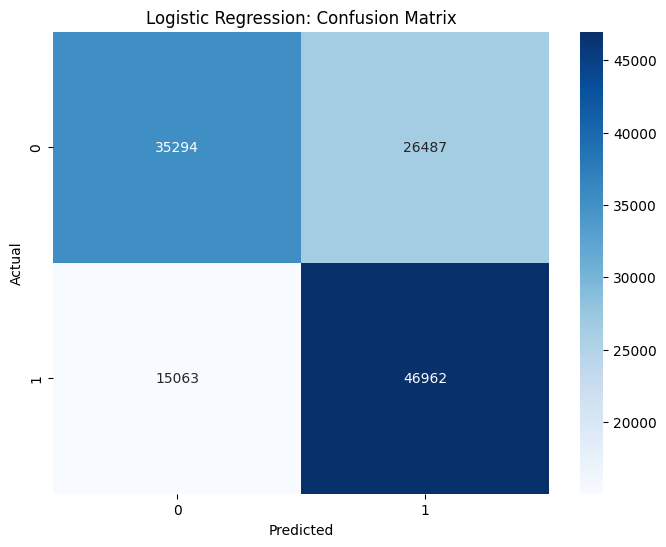

In [56]:
import seaborn as sns

# Confusion Matrix for Logistic Regression
conf_matrix_logreg = pd.crosstab(y_cls_test, y_cls_pred_logreg, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression: Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


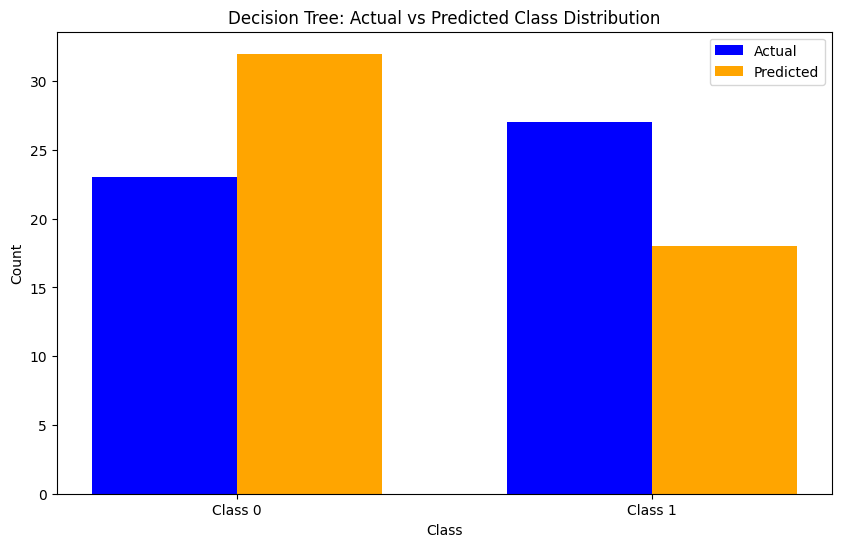

In [57]:
# Bar Plot for Decision Tree Predictions
dt_actual_counts = pd.Series(y_cls_test[:50]).value_counts()
dt_predicted_counts = pd.Series(y_cls_pred_dt[:50]).value_counts()

plt.figure(figsize=(10, 6))
bar_width = 0.35
labels = ['Class 0', 'Class 1']

x = range(len(labels))
plt.bar(x, dt_actual_counts.sort_index(), width=bar_width, label='Actual', color='blue')
plt.bar([p + bar_width for p in x], dt_predicted_counts.sort_index(), width=bar_width, label='Predicted', color='orange')

plt.xticks([p + bar_width / 2 for p in x], labels)
plt.title("Decision Tree: Actual vs Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()


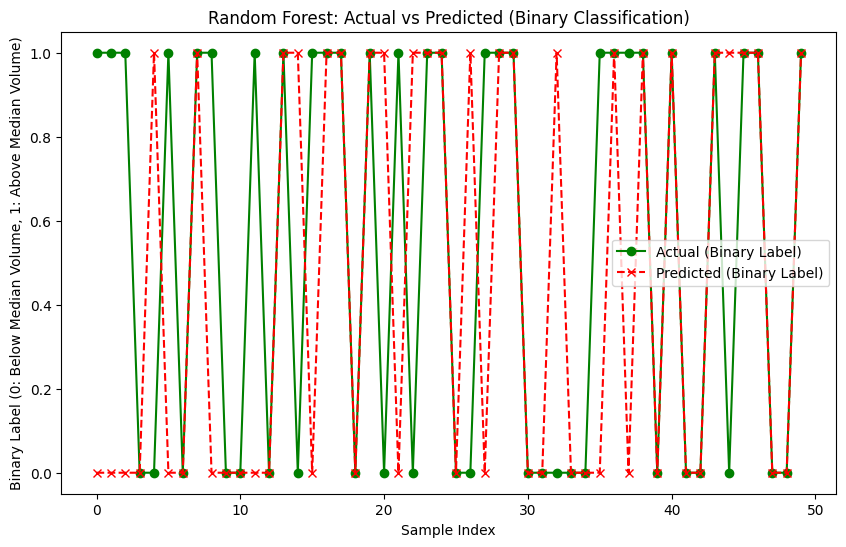

In [58]:
# Line Plot for Random Forest Predictions
plt.figure(figsize=(10, 6))
plt.plot(y_cls_test.values[:50], label="Actual (Binary Label)", linestyle='-', marker='o', color='green')
plt.plot(y_cls_pred_rf[:50], label="Predicted (Binary Label)", linestyle='--', marker='x', color='red')
plt.title("Random Forest: Actual vs Predicted (Binary Classification)")
plt.xlabel("Sample Index")
plt.ylabel("Binary Label (0: Below Median Volume, 1: Above Median Volume)")
plt.legend()
plt.show()


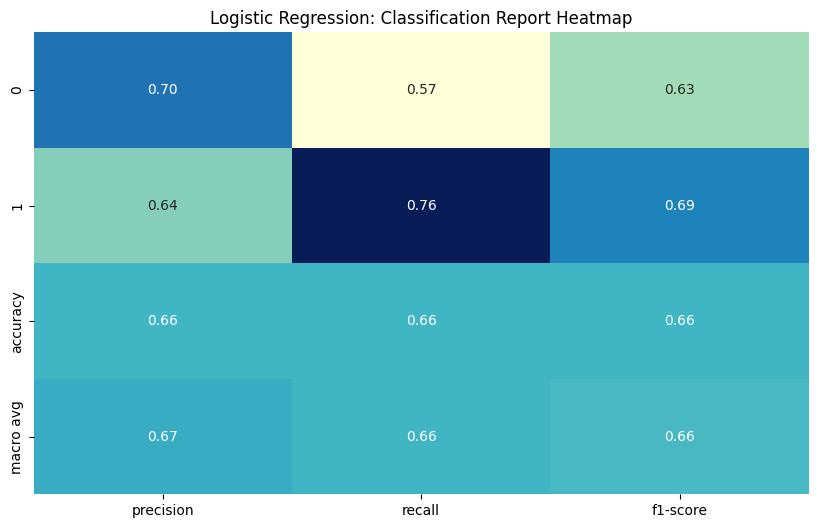

In [59]:
from sklearn.metrics import classification_report

# Logistic Regression Classification Report
logreg_report = classification_report(y_cls_test, y_cls_pred_logreg, output_dict=True)
logreg_df = pd.DataFrame(logreg_report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(logreg_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu", cbar=False, fmt=".2f")
plt.title("Logistic Regression: Classification Report Heatmap")
plt.show()


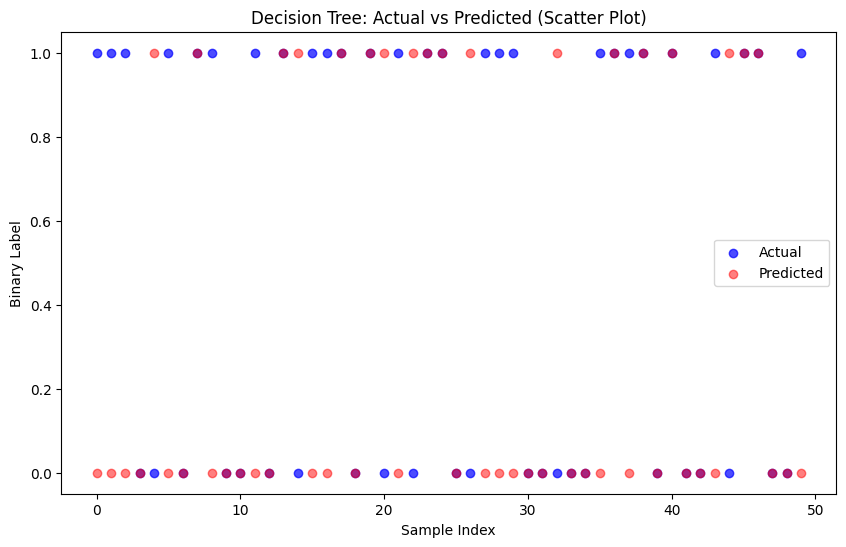

In [60]:
# Scatter Plot for Decision Tree Predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_cls_test[:50])), y_cls_test[:50], color='blue', label='Actual', alpha=0.7)
plt.scatter(range(len(y_cls_pred_dt[:50])), y_cls_pred_dt[:50], color='red', label='Predicted', alpha=0.5)
plt.title("Decision Tree: Actual vs Predicted (Scatter Plot)")
plt.xlabel("Sample Index")
plt.ylabel("Binary Label")
plt.legend()
plt.show()


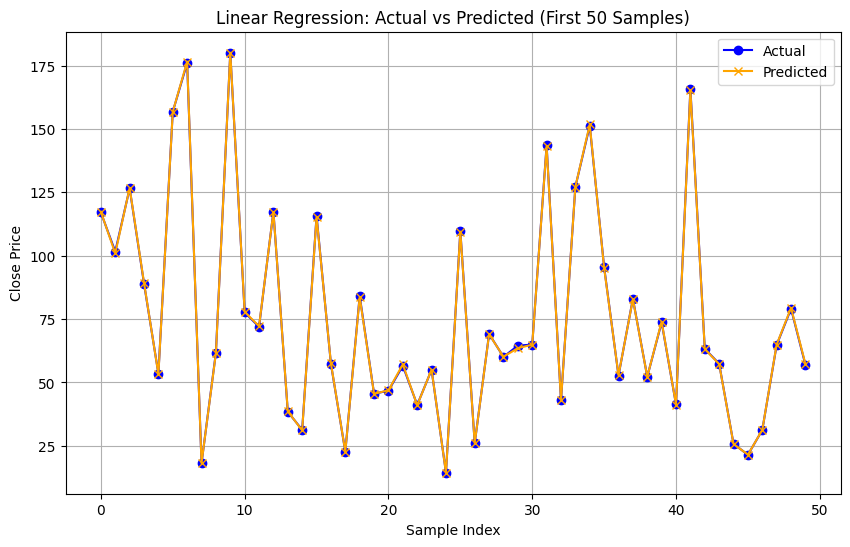

In [61]:
# Line Plot: Actual vs Predicted (First 50 Samples)
plt.figure(figsize=(10, 6))
plt.plot(y_reg_test.values[:50], label="Actual", marker='o', color="blue")
plt.plot(y_reg_pred[:50], label="Predicted", marker='x', color="orange")
plt.title("Linear Regression: Actual vs Predicted (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()
